In [1]:
%matplotlib widget

In [2]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.cf_helper import CFComputations
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [4]:
boxes = [CFComputations(Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf_real_data/nside_0/rsd/0.1_200_41/0.8_2.1/0/0'))]

In [5]:
colore_box = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis') / 'CoLoRe_boxes' / 'high_3x2_600'
theory = ComputeModelsCoLoRe(
    box_path=colore_box,
    source=1, 
    apply_lognormal=False)

/global/homes/c/cramirez/.conda/envs/CoLoRe/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/global/homes/c/cramirez/.conda/envs/CoLoRe/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap ha

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
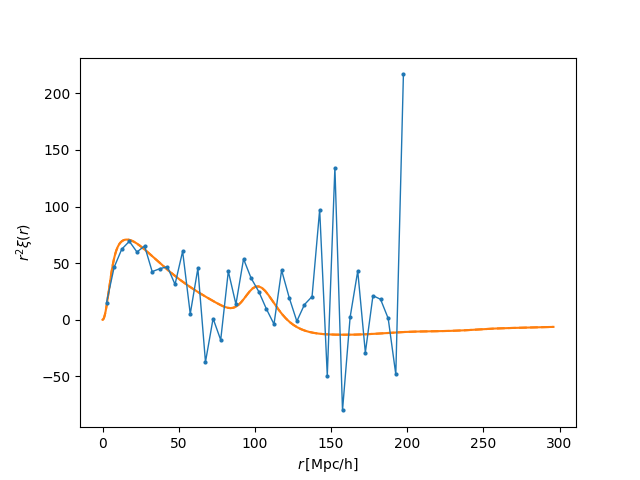

In [6]:
fig, ax = plt.subplots()
pole=0

z = theory.get_zeff(0.8, 2.1)
Plots.plot_data(pole, boxes, ax=ax, plot_args=dict(fmt='-', marker='o', markersize=2, lw=1))
Plots.plot_theory(pole, z=z, theory=theory, ax=ax, rsd=True, no_labels=True)

/global/homes/c/cramirez/.conda/envs/CoLoRe/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/global/homes/c/cramirez/.conda/envs/CoLoRe/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap ha

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
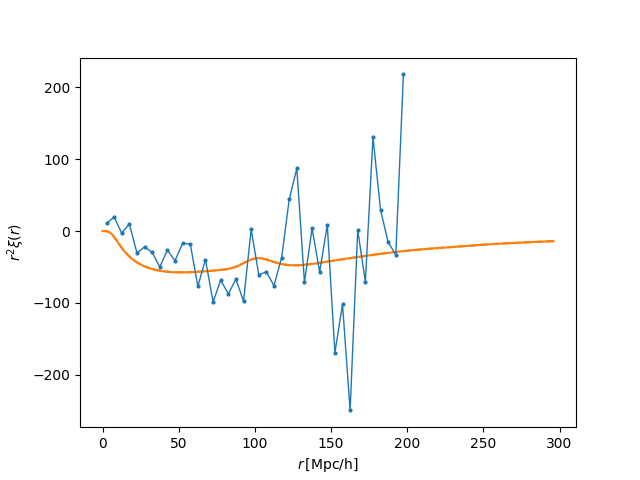

In [7]:
fig, ax = plt.subplots()
pole=2

z = theory.get_zeff(0.8, 2.1)
Plots.plot_data(pole, boxes, ax=ax, plot_args=dict(fmt='-', marker='o', markersize=2, lw=1))
Plots.plot_theory(pole, z=z, theory=theory, ax=ax, rsd=True, no_labels=True)

# Perform fit

We do not expect it to work really well anyway.


In [63]:
fitter = Fitter(boxes=boxes, z=z, theory=theory, poles=[0,], rsd=True, rmin={0:10, 2:10},
                rmax={0:50, 2:50})

fitter.run_fit(free_params=['bias'])

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


/global/homes/c/cramirez/.conda/envs/CoLoRe/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/global/homes/c/cramirez/.conda/envs/CoLoRe/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap ha

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
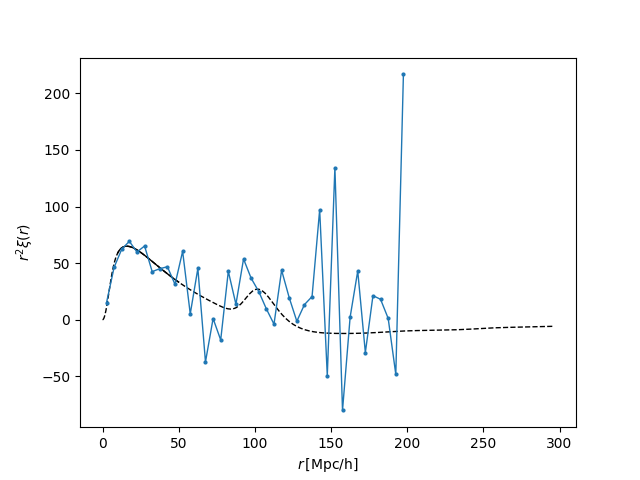

In [64]:
fig, ax = plt.subplots()
pole=0

z = theory.get_zeff(0.8, 2.1)
Plots.plot_data(pole, boxes, ax=ax, plot_args=dict(fmt='-', marker='o', markersize=2, lw=1))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1))

/global/homes/c/cramirez/.conda/envs/CoLoRe/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/global/homes/c/cramirez/.conda/envs/CoLoRe/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap ha

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
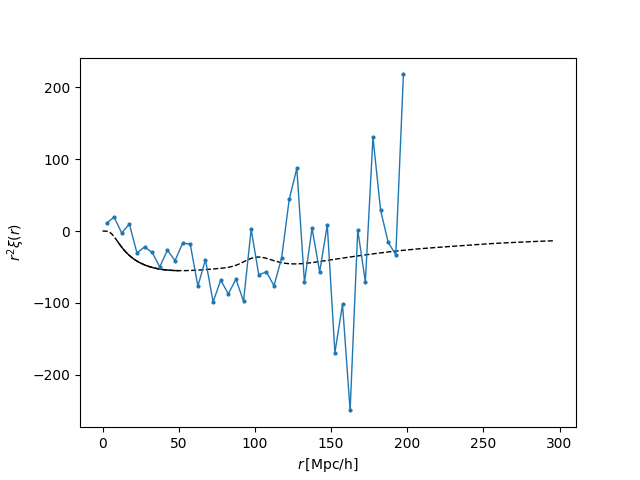

In [65]:
fig, ax = plt.subplots()
pole=2

z = theory.get_zeff(0.8, 2.1)
Plots.plot_data(pole, boxes, ax=ax, plot_args=dict(fmt='-', marker='o', markersize=2, lw=1))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1))